The following histogram intends to give an idea of how many tries it took for users to get the appropriate response (denote n_asks). Here, it is assumed that if users have stopped pressing the 'Ask Again' button, it would mean that they got an appropriate response. The data was collected from

In [1]:
import pandas as pd
import import_ipynb
import Test as t


df = pd.read_csv('../data/web_responses/responses.csv')

importing Jupyter notebook from Test.ipynb
score is 0.5704040080308914
score is 0.6048931777477264
score is 0.28732863813638687
score is 0.1236298717558384
score is 0.9196281731128693
score is 1.0333175957202911
score is 0.6869828104972839
score is 0.6787922084331512
score is 0.9357615411281586
score is 0.4119967073202133
score is 0.1684480793774128
score is 0.9635390043258667
score is 1.528080403804779
score is 0.8309200257062912
{'../data/advice.txt': [0.5704040080308914, 0.6048931777477264, 0.28732863813638687, 0.1236298717558384, 0.9196281731128693, 1.0333175957202911, 0.6869828104972839], '../data/heyfromthefuture/filtered.txt': [0.6787922084331512, 0.9357615411281586, 0.4119967073202133, 0.1684480793774128, 0.9635390043258667, 1.528080403804779, 0.8309200257062912]}


In [34]:
display(df)

,n_asks,ask_time,id
0,1,43:48.7,1
1,1,43:58.4,2
2,1,44:21.6,3
3,1,59:57.4,7
4,1,35:15.7,8
...,...,...,...
1355,1,50:55.3,1402
1356,1,12:31.1,1446
1357,1,13:09.6,1447
1358,1,13:38.1,1448


<AxesSubplot:ylabel='Frequency'>

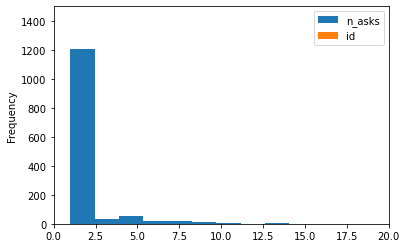

In [20]:
df.plot.hist(by='n_asks', xlim=(0,20), ylim=(0,1500), bins=1000)

To analyze what the rate of accuracy is, we simply calculate *Accuracy = count(n_asks=1)/number of rows*

In [26]:
percent_accurate = df['n_asks'].value_counts(normalize=True)[1] #percentage of accurate responses where n_asks=1
print('The accuracy rate is {}%'.format(round(percent_accurate*100)))



The accuracy rate is 85%


Below, the normalized distribution of n_asks is shown for the top 13 counts.

In [28]:
df['n_asks'].value_counts(normalize=True)[:13]

1     0.848529
2     0.040441
3     0.025735
4     0.025735
5     0.012500
6     0.012500
7     0.008824
9     0.007353
8     0.006618
10    0.004412
13    0.001471
14    0.001471
30    0.000735
Name: n_asks, dtype: float64

In [2]:
files = ["../data/advice.txt", "../data/heyfromthefuture/filtered.txt"]
queries = ["im overweight", "my girlfriend left me", "I Am sadd", "I am Happo", "why is life so hard","How do I pay off my debt?","I don't want children"]
scores = {files[0]:[], files[1]:[]}

for file in files: 
    for query in queries:
        score = t.testFiles(query, file)
        print('score is', score)
        scores[file].append(score)
df2=pd.DataFrame.from_dict(scores,orient='index').transpose()
display(df2)

score is 0.5704040080308914
score is 0.6048931777477264
score is 0.28732863813638687
score is 0.1236298717558384
score is 0.9196281731128693
score is 1.0333175957202911
score is 0.6869828104972839
score is 0.6787922084331512
score is 0.9357615411281586
score is 0.4119967073202133
score is 0.1684480793774128
score is 0.9635390043258667
score is 1.528080403804779
score is 0.8309200257062912


,../data/advice.txt,../data/heyfromthefuture/filtered.txt
0,0.570404,0.678792
1,0.604893,0.935762
2,0.287329,0.411997
3,0.123630,0.168448
4,0.919628,0.963539
5,1.033318,1.528080
6,0.686983,0.830920


<AxesSubplot:>

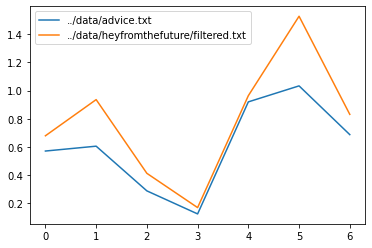

In [3]:
df2.plot()